In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats.stats as st
import sklearn.linear_model as lm

In [77]:
d = pd.read_csv("clean.csv")

In [41]:
pd.options.display.max_rows=3000
#print(d)
print(d.tail(10))
pd.options.display.max_rows=20

            Date  Mileage time_corr  pace_min   test
2373  2019-11-24    14.00   1:37:02  6.930952  False
2374  2019-11-27     5.02   0:36:08  7.197875  False
2375  2019-11-28     6.15   0:42:22  6.888889  False
2376  2019-11-29     6.26   0:46:15  7.388179  False
2377  2019-11-30     3.11   0:15:44  5.058950   True
2378  2019-11-30     4.90       NaN       NaN  False
2379  2019-12-03     7.28   0:53:04  7.289377  False
2380  2019-12-04     9.58       NaN       NaN  False
2381  2019-12-05     7.00   0:50:33  7.221429  False
2382  2019-12-06     4.09   0:27:53  6.817441  False


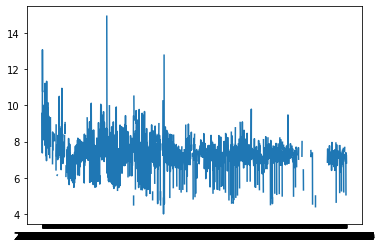

In [36]:
plt.plot(d['Date'], d['pace_min'])
plt.show()

(array([  40.,  121.,  358., 1025.,  215.,   44.]),
 array([ 4,  5,  6,  7,  8,  9, 10]),
 <a list of 6 Patch objects>)

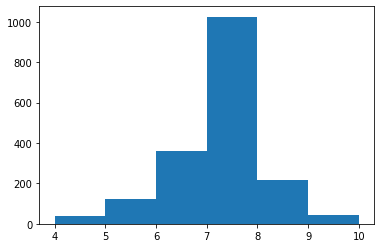

In [104]:
plt.hist(d['pace_min'], bins = [4,5,6,7,8,9,10])

In [80]:
k5 = d[(d['Mileage'] > 3.09) & (d['Mileage'] < 3.12)]
pd.options.display.max_rows=130
print(k5)
pd.options.display.max_rows=20

            Date  Mileage time_corr  pace_min
0     2009-04-25     3.10   0:29:38  9.559140
1     2009-11-21     3.10   0:22:51  7.370968
20    2010-04-24     3.10   0:24:12  7.806452
67    2010-08-20     3.10   0:20:59  6.768817
69    2010-08-24     3.10   0:21:15  6.854839
74    2010-09-01     3.10   0:21:01  6.779570
80    2010-09-13     3.10   0:21:10  6.827957
82    2010-09-18     3.10   0:19:27  6.274194
84    2010-09-21     3.10   0:20:26  6.591398
92    2010-10-02     3.10   0:19:39  6.338710
95    2010-10-07     3.10   0:19:42  6.354839
99    2010-10-15     3.10   0:19:57  6.435484
107   2010-10-29     3.10   0:19:01  6.134409
119   2010-12-18     3.10   0:25:00  8.064516
124   2011-01-04     3.10   0:22:32  7.268817
125   2011-01-07     3.10   0:24:18  7.838710
126   2011-01-13     3.10   0:23:00  7.419355
136   2011-02-13     3.10   0:19:59  6.446237
147   2011-06-10     3.10   0:21:40  6.989247
149   2011-06-17     3.10   0:21:56  7.075269
150   2011-06-21     3.10   0:22:1

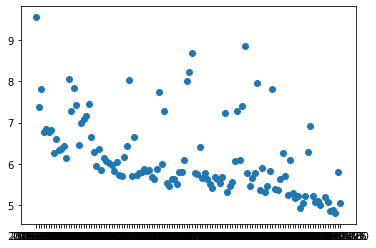

In [107]:
plt.scatter(k5['Date'], k5['pace_min'])
plt.show()

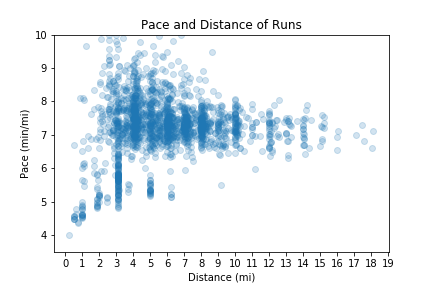

In [127]:
plt.ylim(3.5, 10)
plt.scatter(d['Mileage'], d['pace_min'], alpha=0.2)
plt.xticks(np.arange(0, max(d['Mileage'])+1, 1.0))
plt.xlabel("Distance (mi)")
plt.ylabel("Pace (min/mi)")
plt.title("Pace and Distance of Runs")
plt.show()

In [136]:
dna = d.dropna()
print(dna)

            Date  Mileage time_corr   pace_min
0     2009-04-25     3.10   0:29:38   9.559140
1     2009-11-21     3.10   0:22:51   7.370968
2     2010-01-04     1.30   0:17:00  13.076923
3     2010-01-05     2.60   0:28:00  10.769231
4     2010-01-07     2.60   0:28:00  10.769231
6     2010-01-14     2.60   0:26:00  10.000000
7     2010-01-16     4.05   0:35:48   8.839506
8     2010-01-19     2.60   0:24:00   9.230769
9     2010-01-25     2.66   0:24:15   9.116541
10    2010-01-26     2.60   0:24:19   9.352564
...          ...      ...       ...        ...
2370  2019-11-21     6.21   0:44:23   7.147075
2371  2019-11-22     8.22   0:58:04   7.064071
2373  2019-11-24    14.00   1:37:02   6.930952
2374  2019-11-27     5.02   0:36:08   7.197875
2375  2019-11-28     6.15   0:42:22   6.888889
2376  2019-11-29     6.26   0:46:15   7.388179
2377  2019-11-30     3.11   0:15:44   5.058950
2379  2019-12-03     7.28   0:53:04   7.289377
2381  2019-12-05     7.00   0:50:33   7.221429
2382  2019-12

In [139]:
st.pearsonr(dna['Mileage'], dna['pace_min'])

(0.06038241790413832, 0.010039784744218246)

In [150]:
dna.dtypes

Date          object
Mileage      float64
time_corr     object
pace_min     float64
dtype: object

In [161]:
x = np.array(dna['Mileage'].tolist())
x = x.reshape(-1, 1)
y = np.array(dna['pace_min'].tolist())
y = y.reshape(-1, 1)
model = lm.LinearRegression().fit(x, y)

In [163]:
r_sq = model.score(x,y)
print(r_sq)

0.003646036391950269
